In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../data/vouchers.csv", index_col=0)
df = df.query(" TAB3SMPL==1 & BOG95SMP==1 ") # データの絞り込み

In [3]:
df.head()

,ID,BOG95SMP,BOG97SMP,JAM93SMP,SEX,AGE,AGE2,HSVISIT,SCYFNSH,INSCHL,...,REPT,NREPT,FINISH6,FINISH7,FINISH8,SEX_MISS,USNGSCH,HOURSUM,TAB3SMPL,WORKING3
4,3.0,1,0,0,0.0,14.0,12.0,0.0,8,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
5,4.0,1,0,0,1.0,14.0,12.0,0.0,8,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
6,5.0,1,0,0,0.0,14.0,12.0,0.0,8,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
7,6.0,1,0,0,0.0,12.0,10.0,0.0,7,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
11,10.0,1,0,0,1.0,14.0,11.0,0.0,8,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [4]:
len(df)

1147

In [5]:
df.columns

Index(['ID', 'BOG95SMP', 'BOG97SMP', 'JAM93SMP', 'SEX', 'AGE', 'AGE2',
       'HSVISIT', 'SCYFNSH', 'INSCHL', 'PRSCH_C', 'PRSCHA_1', 'PRSCHA_2',
       'VOUCH0', 'BOG95ASD', 'BOG97ASD', 'JAM93ASD', 'DBOGOTA', 'DJAMUNDI',
       'D1995', 'D1997', 'RESPONSE', 'TEST_TAK', 'SEX_NAME', 'SVY', 'D1993',
       'PHONE', 'DAREA1', 'DAREA2', 'DAREA3', 'DAREA4', 'DAREA5', 'DAREA6',
       'DAREA7', 'DAREA8', 'DAREA9', 'DAREA10', 'DAREA11', 'DAREA12',
       'DAREA13', 'DAREA14', 'DAREA15', 'DAREA16', 'DAREA17', 'DAREA18',
       'DAREA19', 'DMONTH1', 'DMONTH2', 'DMONTH3', 'DMONTH4', 'DMONTH5',
       'DMONTH6', 'DMONTH7', 'DMONTH8', 'DMONTH9', 'DMONTH10', 'DMONTH11',
       'DMONTH12', 'BOG95', 'BOG97', 'MOM_SCH', 'MOM_AGE', 'MOM_MW', 'DAD_SCH',
       'DAD_AGE', 'DAD_MW', 'SEX2', 'STRATA1', 'STRATA2', 'STRATA3', 'STRATA4',
       'STRATA5', 'STRATA6', 'STRATAMS', 'REPT6', 'TOTSCYRS', 'HASCHILD',
       'MARRIED', 'WORKING', 'REPT', 'NREPT', 'FINISH6', 'FINISH7', 'FINISH8',
       'SEX_MISS', 'US

In [6]:
df.isnull().sum()

ID            0
BOG95SMP      0
BOG97SMP      0
JAM93SMP      0
SEX           0
AGE           0
AGE2         54
HSVISIT       0
SCYFNSH       0
INSCHL        0
PRSCH_C       0
PRSCHA_1      0
PRSCHA_2      0
VOUCH0        0
BOG95ASD      0
BOG97ASD      0
JAM93ASD      0
DBOGOTA       0
DJAMUNDI      0
D1995         0
D1997         0
RESPONSE      0
TEST_TAK      0
SEX_NAME     15
SVY           0
D1993         0
PHONE         0
DAREA1        0
DAREA2        0
DAREA3        0
           ... 
BOG97         0
MOM_SCH     115
MOM_AGE      46
MOM_MW       59
DAD_SCH     318
DAD_AGE     220
DAD_MW      299
SEX2          0
STRATA1       0
STRATA2       0
STRATA3       0
STRATA4       0
STRATA5       0
STRATA6       0
STRATAMS      0
REPT6         0
TOTSCYRS      0
HASCHILD      1
MARRIED       1
WORKING       0
REPT          0
NREPT         0
FINISH6       0
FINISH7       0
FINISH8       0
SEX_MISS      0
USNGSCH       0
HOURSUM       0
TAB3SMPL      0
WORKING3      0
Length: 89, dtype: int64

In [7]:
"""
共変量の候補
介入から数年後の電話アンケートによってデータを集めたが、
電話に出て回答してくれるか否かに関わりそうなバイアスを選択する
"""
selection_bias = [
    'SVY',
    'HSVISIT',
    'AGE',
    'STRATA1',
    'STRATA2',
    'STRATA3',
    'STRATA4',
    'STRATA5',
    'STRATA6',
    'STRATAMS',
    'D1993',
    'D1995',
    'D1997',
    'DMONTH1',
    'DMONTH2',
    'DMONTH3',
    'DMONTH4',
    'DMONTH5',
    'DMONTH6',
    'DMONTH7',
    'DMONTH8',
    'DMONTH9',
    'DMONTH10',
    'DMONTH11',
    'DMONTH12',
    'SEX2'
]

z = ["VOUCH0"]

formula_y = [
    "TOTSCYRS",
    "INSCHL",
    "PRSCH_C",
    "USNGSCH",
    "PRSCHA_1",
    "FINISH6",
    "FINISH7",
    "FINISH8", 
    "REPT6", 
    "REPT", 
    "NREPT", 
    "MARRIED", 
    "HASCHILD", 
    "HOURSUM", 
    "WORKING3"
]

In [8]:
y = df["PRSCHA_1"]
x = df[z+selection_bias]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PRSCHA_1   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     2.755
Date:                Sun, 07 Aug 2022   Prob (F-statistic):           3.73e-05
Time:                        11:55:42   Log-Likelihood:                -167.56
No. Observations:                1147   AIC:                             379.1
Df Residuals:                    1125   BIC:                             490.1
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
VOUCH0         0.0574      0.017      3.385      0.001       0.024       0.091
SVY           -0.0465      0.039     -1.178      0.239      -0.124       0.031
HSVISIT        0.0643      0.042      1.546      0.122      -0.017       0.146
AGE           -0.0147      0.006     -2.275      0.023      -0.027      -0.002
STRATA1        0.1206      0.041      2.921      0.004       0.040       0.202
STRATA2        0.1263      0.037      3.372      0.001       0.053       0.200
STRATA3        0.0906      0.041      2.209      0.027       0.010       0.171
STRATA4        0.2062      0.105      1.956      0.051      -0.001       0.413
STRATA5        0.1931      0.174      1.111      0.267      -0.148       0.534
STRATA6    -2.543e-16   1.71e-16     -1.486      0.138    -5.9e-16    8.14e-17
STRATAMS       0.1477      0.041      3.580      0.000       0.067       0.229
D1993       3.846e-18   5.15e-17      0.075      0.941   -9.72e-17    1.05e-16
D1995          0.8845      0.088     10.042      0.000       0.712       1.057
D1997       1.332e-16   1.09e-16      1.227      0.220   -7.98e-17    3.46e-16
DMONTH1        0.1404      0.061      2.294      0.022       0.020       0.260
DMONTH2        0.0442      0.055      0.810      0.418      -0.063       0.151
DMONTH3        0.0885      0.037      2.368      0.018       0.015       0.162
DMONTH4        0.1321      0.038      3.486      0.001       0.058       0.206
DMONTH5        0.0307      0.045      0.686      0.493      -0.057       0.119
DMONTH6        0.1133      0.046      2.439      0.015       0.022       0.204
DMONTH7        0.1645      0.044      3.710      0.000       0.077       0.252
DMONTH8        0.1634      0.042      3.871      0.000       0.081       0.246
DMONTH9        0.1199      0.087      1.381      0.168      -0.050       0.290
DMONTH10       0.2697      0.262      1.028      0.304      -0.245       0.784
DMONTH11      -0.1475      0.121     -1.217      0.224      -0.385       0.090
DMONTH12      -0.2345      0.112     -2.094      0.037      -0.454      -0.015
SEX2          -0.0132      0.017     -0.783      0.434      -0.046       0.020
==============================================================================
Omnibus:                      621.831   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2979.175
Skew:                          -2.680   Prob(JB):                         0.00
Kurtosis:                       8.796   Cond. No.                     1.41e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.32e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix 

In [9]:
print(model.params["VOUCH0"])
print(model.pvalues["VOUCH0"])
print(model.bse["VOUCH0"])

0.05743072223730456
0.0007358179956939783
0.016965256018900903


In [10]:
# まとめて回帰分析
models = {}
model_name = []
coef_base = []
std_error_base = []
pvalue_base = []
coef_cov = []
std_error_cov = []
pvalue_cov = []

for y_name in formula_y:
    y = df[y_name]
    
    # 共変量なしの介入変数だけ
    x_base = df[z]
    x_base = sm.add_constant(x_base) 
    model_base = sm.OLS(y, x_base).fit()
    coef_base.append(model_base.params["VOUCH0"])
    std_error_base.append(model_base.bse["VOUCH0"])
    pvalue_base.append(model_base.pvalues["VOUCH0"])
    models[y_name+"_base"] = model_base
    
    # 共変量を加えたもの
    x_cov = df[z+selection_bias]
    x_cov = sm.add_constant(x_cov) 
    model_cov = sm.OLS(y, x_cov).fit()
    coef_cov.append(model_cov.params["VOUCH0"])
    std_error_cov.append(model_cov.bse["VOUCH0"])
    pvalue_cov.append(model_cov.pvalues["VOUCH0"])
    models[y_name+"_cov"] = model_cov
    
    model_name.append(y_name)

In [11]:
df_results = pd.DataFrame({
    "coef_base" : coef_base,
    "std_error_base" : std_error_base,
    "pvalue_base" : pvalue_base,
    "coef_cov" : coef_cov,
    "std_error_cov" : std_error_cov,
    "pvalue_cov" : pvalue_cov,
})
df_results.index = model_name
df_results.head()

,coef_base,std_error_base,pvalue_base,coef_cov,std_error_cov,pvalue_cov
TOTSCYRS,0.058086,0.052353,2.674388e-01,0.033660,0.050910,5.086438e-01
INSCHL,0.018612,0.021641,3.899529e-01,0.006904,0.020288,7.337089e-01
PRSCH_C,0.159999,0.028291,1.962310e-08,0.153330,0.027775,4.198494e-08
USNGSCH,0.508872,0.023018,1.796250e-90,0.504160,0.022909,1.491107e-89
PRSCHA_1,0.062947,0.016873,2.003331e-04,0.057431,0.016965,7.358180e-04


In [12]:
print(df.query(" VOUCH0==0 ")["PRSCHA_1"].mean())
print(df.query(" VOUCH0==1 ")["PRSCHA_1"].mean())

0.8772241992882562
0.9401709401709402


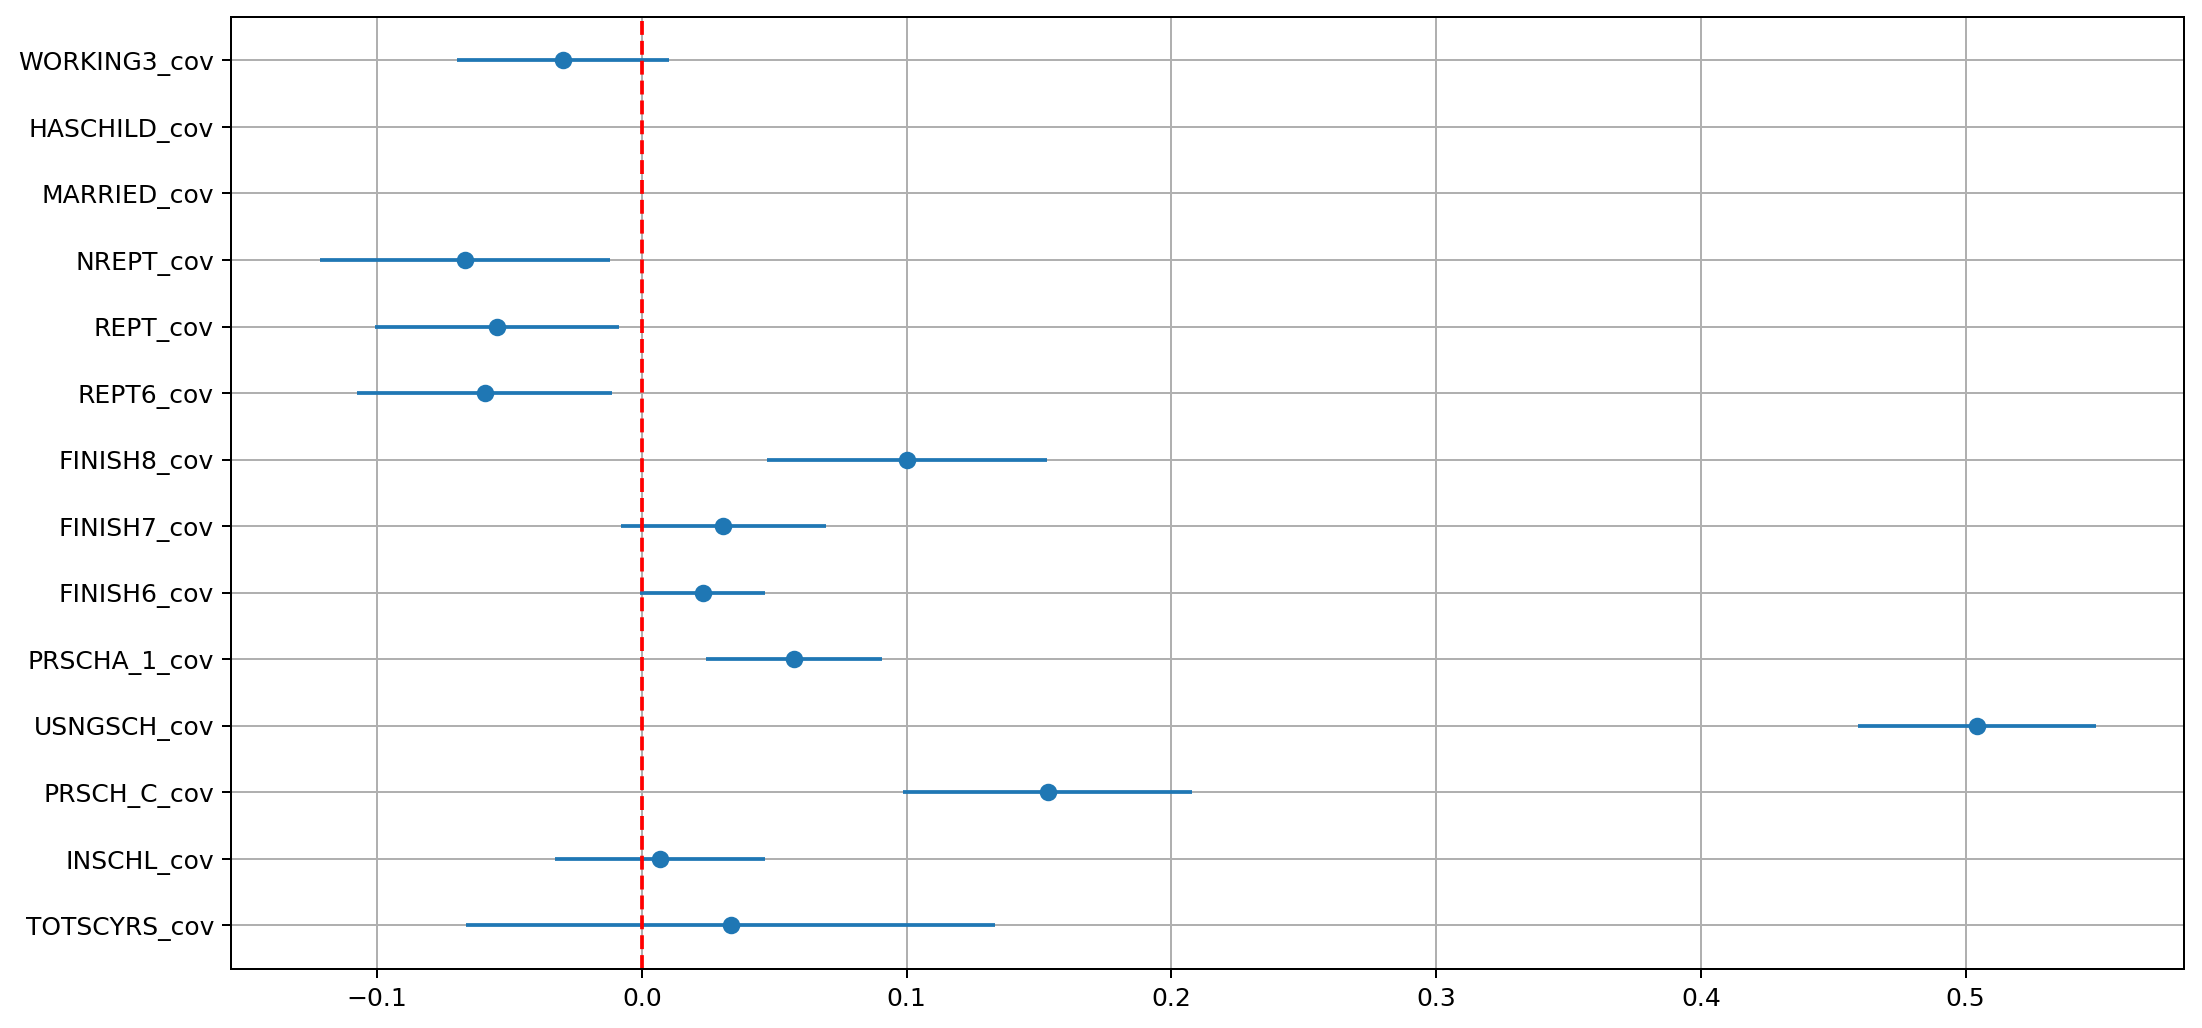

In [30]:
coefs = []
varnames = []
errors = []

for y in formula_y:
    if y == "HOURSUM":
        continue
    varname = y + "_cov"
    coef = models[varname].params["VOUCH0"]
    ci = models[varname].conf_int().loc["VOUCH0", 1]
    error = ci - coef
    
    coefs.append(coef)
    varnames.append(varname)
    errors.append(error)

fig = plt.figure(figsize=(14, 7), dpi=180)
ax = fig.add_subplot(111)
ax.errorbar(x=coefs, y=varnames, xerr=errors, fmt='o')
ax.axvline(0, color='red', linestyle="--") 
plt.grid()
plt.show()
plt.close()